# Midterm 1

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
data_dir = '/content/drive/MyDrive/Colab Notebooks'

In [23]:
!pip install biopython

## DNA Sequence Translation

In [24]:
from Bio.Seq import Seq

# Define the DNA sequence
dna_sequence = "GGGACCACGAAAGAAGTCCACTCGTCCGAGCTCCGCGTCGACGAGGACCTCGCGATGGGTCTCACGCCCTTGGACGAAGACGCCGGACCGCCCCTACCGTTCCTGTCACACAGACAGTGGTGGGCCGTCTAAGAGTTACCCAGAGGGCACCAGTTTGTGATGTTTCACTTCGCCCGTCCAAGATTCATACACTAGCTGCACCTTCTGGGCAAAAGGACGGGGAGCGACCTTCGACATCAGTTGATAAAACACTGCGTGTGGTTCTCCCGCGACCAGGGGAAGAACAAC"

# Create a BioPython Seq object
sequence = Seq(dna_sequence)

dna_seqs = [sequence, sequence[::-1], sequence.complement(), sequence.reverse_complement()]

# generate all translation frames
aa_seqs = (s[i:].translate(to_stop=True) for i in range(3) for s in dna_seqs)

for aa_seq in aa_seqs:
  print("Translation: " + aa_seq + ", Length: " + str(len(aa_seq)))

Translation: GTTKEVHSSELRVDEDLAMGLTPLDEDAGPPLPFLSHRQWWAV, Length: 43
Translation: QQEGDQRPLGVRHKIVDYSFQRGAGKRVFHVDHILRTCPLHFVVFDHGRPIENLPGGDRHTVLAIPARPQKQVPALWVALQEQLRLEPAHLKKAPG, Length: 96
Translation: PWCFLQVSRLEAQLLLERYPECGNLLLRPGGDGKDSVSVTTRQILNGSPVVKHYKVKRAGSKYVIDVEDPFSCPSLEAVVNYFVTHTKRALVPFLL, Length: 96
Translation: VVLPLVAGEPHAVFYQLMSKVAPRPFAQKVQLVYESWTGEVKHHKLVPSG, Length: 50
Translation: GPRKKSTRPSSASTRTSRWVSRPWTKTPDRPYRSCHTDSGGPSKSYPEGTSL, Length: 52
Translation: NKKGTSALLVCVTK, Length: 14
Translation: PGAFFR, Length: 6
Translation: LFFPWSRENHTQCFIN, Length: 16
Translation: DHERSPLVRAPRRRGPRDGSHALGRRRRTAPTVPVTQTVVGRLRVTQRAPVCDVSLRPSKIHTLAAPSGQKDGERPSTSVDKTLRVVLPRPGEEQ, Length: 95
Translation: TRRGPAPSWCASQNS, Length: 15
Translation: LVLSSGEQARGAAAPGALPRVREPASAAWRGWQGQCVCHHPADSQWVSRGQTLQSEAGRF, Length: 60
Translation: CSSPGRGRTTRSVLSTDVEGRSPSFCPEGAASV, Length: 33


/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


## BLAST Search

Search homologous sequences with the EBI BLAST [webservice](https://www.ebi.ac.uk/Tools/sss/ncbiblast/).


1. Select Database
```
PROTEIN DATABASES --> SwissProt
```
2. Paste the sequence
Click "More options" button
```
ALIGNMENTS --> 1000  # Maximum number of match alignments reported in the result output
ALIGNMENT VIEWS --> BLASTXML  # important!
EXP.THR --> 1e-2
```
3. When finished
```
"Tool output" --> Right click "Download" --> "Save link as..."
```

N.B. Do not click on "Download in XML format" otherwise the Python parser won't work!

The best results were obtained for:
```
PWCFLQVSRLEAQLLLERYPECGNLLLRPGGDGKDSVSVTTRQILNGSPVVKHYKVKRAGSKYVIDVEDPFSCPSLEAVVNYFVTHTKRALVPFLL
```

In [25]:
from Bio.Blast import NCBIXML

# Load BLAST XML result file
result_handle = open("{}/ncbiblast-I20231111-115503-0991-78675620-p1m.xml".format(data_dir))
blast_records = NCBIXML.parse(result_handle)

# Iterate through BLAST records
for blast_record in blast_records:
    for alignment in blast_record.alignments:
        for hsp in alignment.hsps:
            # Extract information about the match
            print(f"Query: {blast_record.query}")
            print(f"Subject: {alignment.title}")
            print(f"Length: {alignment.length}")
            print(f"Identities: {hsp.identities}")
            print(f"Positives: {hsp.positives}")
            print(f"Subject Coverage: {hsp.sbjct_start}-{hsp.sbjct_end}")
            print(f"Bit Score: {hsp.bits}")
            print(f"E-value: {hsp.expect}")

            # Calculate percent subject coverage
            percent_subject_coverage = (hsp.sbjct_end - hsp.sbjct_start + 1) / alignment.length * 100
            print(f"Percent Subject Coverage: {percent_subject_coverage:.2f}%")

            print("----")


Query: EMBOSS_001
Subject: SP:Q8R0L1-2 STAP2_MOUSE Isoform 2 of Signal-transducing adaptor protein 2 OS=Mus musculus OX=10090 GN=Stap2
Length: 272
Identities: 96
Positives: 96
Subject Coverage: 151-246
Bit Score: 199.134
E-value: 1.21238e-64
Percent Subject Coverage: 35.29%
----
Query: EMBOSS_001
Subject: SP:Q8R0L1 STAP2_MOUSE Signal-transducing adaptor protein 2 OS=Mus musculus OX=10090 GN=Stap2 PE=1 SV=1
Length: 411
Identities: 96
Positives: 96
Subject Coverage: 151-246
Bit Score: 199.134
E-value: 5.39805e-63
Percent Subject Coverage: 23.36%
----
Query: EMBOSS_001
Subject: SP:Q9UGK3 STAP2_HUMAN Signal-transducing adaptor protein 2 OS=Homo sapiens OX=9606 GN=STAP2 PE=1 SV=2
Length: 403
Identities: 79
Positives: 86
Subject Coverage: 151-246
Bit Score: 163.31
E-value: 3.42269e-49
Percent Subject Coverage: 23.82%
----
Query: EMBOSS_001
Subject: SP:Q9UGK3-2 STAP2_HUMAN Isoform 2 of Signal-transducing adaptor protein 2 OS=Homo sapiens OX=9606 GN=STAP2
Length: 449
Identities: 79
Positives: 

## Alignment Algorithms

Downlaod the sequence of [Q8R0L1](https://rest.uniprot.org/uniprotkb/Q8R0L1.fasta) (STAP2_MOUSE) from UniProtKB.

In [26]:
def align_sequences(target_seq, query_seq):
    """
    Align query sequence against target sequence
    and return alignment information.
    """
    result_alignments = []

    alignment = aligner.align(target_seq, query_seq)[0]

    # Get no. of matches/mistmatches/gaps in the alignment
    c = alignment.counts()

    # Calculate similarity score (percent identity)
    similarity_score = (c.identities / alignment.shape[1]) * 100

    # Return alignment information
    result_alignment = (
        len(alignment.sequences[0]),  # 1 - Target sequence length (the cds)
        len(alignment.sequences[1]),  # 2 - Query sequence length (the exon)
        alignment.aligned[0][0][0],  # 3 - Target start index in the alignment (initial gaps are skipped)
        alignment.aligned[0][-1][1],  # 4 - Target end
        alignment.aligned[1][0][0],  # 5 - Query start
        alignment.aligned[1][-1][1],  # 6 - Query end
        alignment.shape[1],  # 7 - Alignment length (matches + mismatches + gaps columns)
        c.identities,  # 8 - Matches
        c.mismatches,  # 9 - Mismatches (substitutions)
        c.gaps,  # 10 - Gaps
        alignment.score,  # 11 - Alignment score
        alignment.score / len(alignment.query),  # 12 - Average alignment score per position for the query
        (c.identities + c.mismatches) / len(alignment.query),  # 13 - Average positive matches per residue for the query
        similarity_score  # 14 - Similarity score (percent identity)
    )

    # print(alignment)
    # break
    return result_alignment

def print_alignments(result_alignment):
    # Sort alignments by start and end position in the target and print prettily
    print("    t_len   q_len t_start   t_end q_start   q_end   a_len   ident    mism    gaps   score     q_s   q_cov   similarity")
    print("{:>8}{:>8}{:>8}{:>8}{:>8}{:>8}{:>8}{:>8}{:>8}{:>8}{:>8.1f}{:>8.1f}{:>8.1f}{:>8.2f}%".format(*result_alignment))


In [27]:
from Bio.Align import substitution_matrices

# Substitution matrix
blosum62 = substitution_matrices.load('BLOSUM62')
print(blosum62)

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
     A    R    N    D    C    Q    E    G    H    I    L    K    M    F    P    S    T    W    Y    V    B    Z    X    *
A  4.0 -1.0 -2.0 -2.0  0.0 -1.0 -1.0  0.0 -2.0 -1.0 -1.0 -1.0 -1.0 -2.0 -1.0  1.0  0.0 -3.0 -2.0  0.0 -2.0 -1.0  0.0 -4.0
R -1.0  5.0  0.0 -2.0 -3.0  1.0  0.0 -2.0  0.0 -3.0 -2.0  2.0 -1.0 -3.0 -2.0 -1.0 -1.0 -3.0 -2.0 -3.0 -1.0  0.0 -1.0 -4.0
N -2.0  0.0  6.0  1.0 -3.0  0.0  0.0  0.0  1.0 -3.0 -3.0  0.0 -2.0 -3.0 -2.0  1.0  0.0 -4.0 -2.0 -3.0  3.0  0.0 -1.0 -4.0
D -2.0 -2.0  1.0  6.0 -3.0  0.0  2.0 -1.0 -1.0 -3.0 -4.0 -1.0 -3.0 -3.0 -1.0  0.0 -1.0 -4.0 -3.0 -3.0  4.0  1.0 -1.0 -4.0
C  0.0 -3.0 -3.0 -3.0  9.0 -3.0 -4.0 -3.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0 -3.0 -1.0 -1.0 -2.0 -2.0 -1.0 -3.0 -3.0 -2.0 -4.0
Q -1.0  1.0  0.0  0.

In [28]:
best_match_sequence = "MATALSPPRGPKLKGAPPSHYYESFLEKKGPCDQDYRKFWAGLQGLAICFYNSNRDLQPLEKLDLRLFSKLRDEALLGSSRDTAYHFSLVLRDQEVKFKVESLESCEMWKGFILTVVELRVPSNLTLLPGHLYMMAEVLTKEEVRRAAEVPWCFLQVSRLEAQLLLERYPECGNLLLRPGGDGKDSVSVTTRQILNGSPVVKHYKVKRAGSKYVIDVEDPFSCPSLEAVVNYFVTHTKRALVPFLLDEDYEKVLGFVDSDRENGESAWAVPSFRASGPALPANVLKPLPPVPVSVSSQEDKLPQLPPLPQLPDTDENYVTPIEDSPAAEYMNQDVSLSSQAVPLKPKKPARLPAKPPKPSVVPKPDLKAITSVWTRKLGGSSSQASSLVTRLGDITAELEEKLQKRRALEH"
query_sequence = "PWCFLQVSRLEAQLLLERYPECGNLLLRPGGDGKDSVSVTTRQILNGSPVVKHYKVKRAGSKYVIDVEDPFSCPSLEAVVNYFVTHTKRALVPFLL"

In [29]:
from Bio import Align

aligner = Align.PairwiseAligner()
aligner.mode = 'global'
#aligner.match_score = 1
#aligner.mismatch_score = -1
aligner.open_gap_score = -1
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

alignments = align_sequences(best_match_sequence, query_sequence)
print_alignments(alignments)

    t_len   q_len t_start   t_end q_start   q_end   a_len   ident    mism    gaps   score     q_s   q_cov   similarity
     411      96       6     246       0      96     411      96       0     315   190.0     2.0     1.0   23.36%


In [30]:
from Bio import Align

aligner = Align.PairwiseAligner()
aligner.mode = 'local'
#aligner.match_score = 1
#aligner.mismatch_score = -1
aligner.open_gap_score = -1
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

alignments = align_sequences(best_match_sequence, query_sequence)
print_alignments(alignments)

    t_len   q_len t_start   t_end q_start   q_end   a_len   ident    mism    gaps   score     q_s   q_cov   similarity
     411      96     150     246       0      96      96      96       0       0   505.0     5.3     1.0  100.00%


## Protein Domain

1. PHMMER Search [HMMSEARCH](https://www.ebi.ac.uk/Tools/hmmer/search/hmmsearch)
```
"Sequence Database" --> "SwissProt"
```
2. Alignment Details
```
"Sequence Matches and Features" --> "Show Hit Details"
```
3. UniProtKB
```
"Advanced Search" --> "Domain[FT]"
```

## Superfamily

In [31]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

# Your sequence data as a string
sequence_data = """
3gfa	A	2	197	GXISDSISKRRSIRKYKNQSISHETIEKIIEAGINAPSSKNRQPWRFVVITEKEKESXLKAXSKGIQNEINDNGLLPGSRQHIAGANYTVEIXKQAPVTIFILNILGKSPLEKLSPEERFYEXANXQSIGAAIQNXSLTAVELGLGSLWICDVYFAYRELCEWLNTDSQLVAAISLGYPDEEPSRRPRLQLSDVTEWR
2wqf	A	2	202	MSFIKSLENRRTIYALGRNVQDEEKVIETIKEAVRFSPTAFNSQTGRLLILTGDAQDKLWDEIVAPELKAAMEAQGVPESAWDNTRAKLDGFKAAFGTILFFEDQAVVKNLQEQFALYADNFPVWSEQGSGIISVNVWTALAELGLGANLQHYNPLIDEAVAKEWNLPESWKLRGQLVFGSIEAPAGEKTFMDDADRFIVAK
1nox	A	6	205	MEATLPVLDAKTAALKRRSIRRYRKDPVPEGLLREILEAALRAPSAWNLQPWRIVVVRDPATKRALREAAFGQAHVEEAPVVLVLYADLEDALAHLDEVIHPGVQGERREAQKQAIQRAFAAMGQEARKAWASGQSYILLGYLLLLLEAYGLGSVPMLGFDPERVRAILGLPSRAAIPALVALGYPAEEGYPSHRLPLERVVLWR
3bem	A	0	205	XGSDKIHHHHHHXAEFTHLVNERRSASNFLSGHPITKEDLNEXFELVALAPSAFNLQHTKYVTVLDQDVKEKLKQAANGQYKVVSSSAVLLVLGDKQAYQQAADIYEGLKVLGILNKQEYDHXVQDTVSFYENRGEQFKRDEAIRNASLSAXXFXLSAAAAGWDTCPXIGFDAEAVKRILNIDDQFEVVXXITIGKEKTESRRPRGYRKPVNEFVEYX
3gr3	A	4	229	GXADAPIDIFQSILSRKSIRAFTDQPVTQETIREILKLAARAPSGTNLQPWQVIVLTGKILQKVGQELSQLVLSGIKGEREYHYYPRQWREPYLSRRRKVGLDLYKSLGIQKGDQEKXLHQKAKNFLFYGAPVGLLFTIDHDXEXGSWLDLGXFXQTIXLAARGFGLDTCAQAAFADYHKQIRSLLSVPSDRHIICGXALGYRDXNAPENNFETEREPIDNFVHFIKSYP
4dn2	A	-5	185	NLYFQSXETLEAIRTRRSVRKFSDRPVEPEKLRAVLDAARLAPSWANXQCWRFVVVEDQATKVQISELSYVEAYFGPKGYKSNPAQKALAEAPVVIIACGEPPQSGELRGQQYYLTDVGIAAQNLXLAAHDLGLGSVFVGVFDEQQLGELLGIPAELRIVGLFPLGYPLEGPKAGPSRKPLDEIVHYGKYQA
3gag	A	0	205	GXXNDYLNFLDGRVSVRRFDPDAVLPNDLIKDXLEHASYAPSGNNFQPWRVVVVKNKNKQEDLKKLAALQPQVATASAVFLLFGDENAYDLTWWQEFHVQKGIITKDEAAARAERIRQYFDLHPEDKETQGLRLDVGLFAXNLXQVVRVYGYDSVPXRGVDFDAIKTYLDXPNGWEPILXLPVGKALQAGNPHVRKSVAEFAEIIE
3hoi	A	0	211	GAERTIQLPKPDXNRAGLLXKALSERHSTREYASKALSNTDLSDLLWAANGINRSSEGKRTAPSAXNRQDIDIYVVLPQGTYLYDAKGHKLNLISEGDHRSAVAGGQAFVNNAPVSLVLVSDLSKLGDAKSNHVQLXGAXDAGIVSQNISLFCSAARLATVPRASXDLVRLKAALKLKDTQXPXXNHPVGYFK
3ge6	A	2	211	GXTTQTATDFXEIVKGRRSIRNYDTNVKISKEEXTQILEEATLAPSSVNXQPWRFLVIDSEEGKATLAPLAKFNQVQVETSSAVIAVFGDXKAIDQLENIYDTAVEKGLXPQEVRDRQVPAIQGXYENVPASALKDSILIDSGLVSXQLXLVARAHGYDTNPIGGYEKDQIAEAFGXEKDRYVPVXLLSIGKAVDAGYPSVRLPINDIADWK
3eo8	A	0	218	GXELQDTIFKRQSVRKFKNQDVSDEDILKXIKAAGAAPSGKNIQNWHFVVIKRRDLXEKIADVITKKQQEILVEXDKVSVDKANRFRKFVKNFTLFYLKAPVLVLVFTKVYNPSGYYELELIDAPKETIDKLFIRNPGXQSLGAAIENFTLSAIELGYGSCWLTSQNYAADEIEAVLEAETGFEKGEYFLGAXLALGVPEDNLKSPSKKPVEEICTFIK
"""

# Split the string into lines
lines = sequence_data.split('\n')

# Extract relevant information and create SeqRecord objects
sequences = []
for line in lines[1:]:
    if line:
        parts = line.split()
        pdb_id = parts[0]
        chain_id = parts[1]
        start = int(parts[2])
        end = int(parts[3])
        sequence = parts[4]

        # Create a SeqRecord
        seq_record = SeqRecord(Seq(sequence), id=pdb_id)
        sequences.append(seq_record)


In [32]:
from Bio import SeqIO
from Bio.Align import substitution_matrices
import numpy as np
from Bio import Align

# Create a matrix to store pairwise sequence identities
identity_matrix = np.zeros((len(sequences), len(sequences)))

# Aligner
aligner = Align.PairwiseAligner()
aligner.mode = 'global'
#aligner.match_score = 1
#aligner.mismatch_score = -1
aligner.open_gap_score = -1
aligner.extend_gap_score = -1
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

# Calculate pairwise sequence identities
for i in range(len(sequences)):
    for j in range(len(sequences)):
        alignment = aligner.align(sequences[i].seq, sequences[j].seq)[0]

        # Get no. of matches/mistmatches/gaps in the alignment
        c = alignment.counts()

        # Calculate similarity score (percent identity)
        similarity_score = (c.identities / alignment.shape[1])

        identity_matrix[i, j] = similarity_score

# Print the 10 x 10 matrix with sequence identifiers as tick labels
print("\t" + "\t".join(seq.id for seq in sequences))
for i, row in enumerate(identity_matrix):
    print(sequences[i].id, end="\t")
    print("\t".join(f"{identity:.2%}" for identity in row))

# Find the sequence most similar to all others
average_identity = np.mean(identity_matrix, axis=1)
max_ident = np.max(average_identity)
most_similar_index = np.argmax(average_identity)
most_similar_sequence = sequences[most_similar_index].id

print(f"\nThe sequence most similar to all others is {most_similar_sequence} with average identity {max_ident:.2%}")


	3gfa	2wqf	1nox	3bem	3gr3	4dn2	3gag	3hoi	3ge6	3eo8
3gfa	100.00%	28.24%	30.50%	27.61%	27.21%	29.55%	24.81%	26.17%	30.08%	34.39%
2wqf	28.14%	100.00%	26.04%	25.81%	24.91%	28.24%	24.91%	24.62%	27.37%	27.24%
1nox	30.38%	25.93%	100.00%	29.48%	28.00%	34.78%	30.47%	28.62%	32.06%	29.45%
3bem	27.61%	25.36%	29.21%	100.00%	27.27%	27.27%	28.83%	27.14%	32.58%	25.54%
3gr3	26.86%	24.91%	27.80%	26.32%	100.00%	28.36%	25.89%	25.18%	26.33%	27.80%
4dn2	29.55%	28.12%	35.04%	26.72%	28.36%	100.00%	27.17%	24.71%	32.56%	30.55%
3gag	24.81%	24.91%	29.96%	28.83%	26.33%	28.74%	100.00%	22.01%	31.66%	26.95%
3hoi	26.17%	24.81%	28.15%	27.04%	24.91%	25.58%	21.72%	100.00%	26.62%	27.37%
3ge6	29.81%	27.47%	32.44%	32.58%	26.95%	32.30%	31.78%	26.62%	100.00%	29.24%
3eo8	34.39%	27.60%	29.56%	25.54%	28.14%	30.77%	27.50%	27.64%	28.78%	100.00%

The sequence most similar to all others is 3ge6 with average identity 36.92%


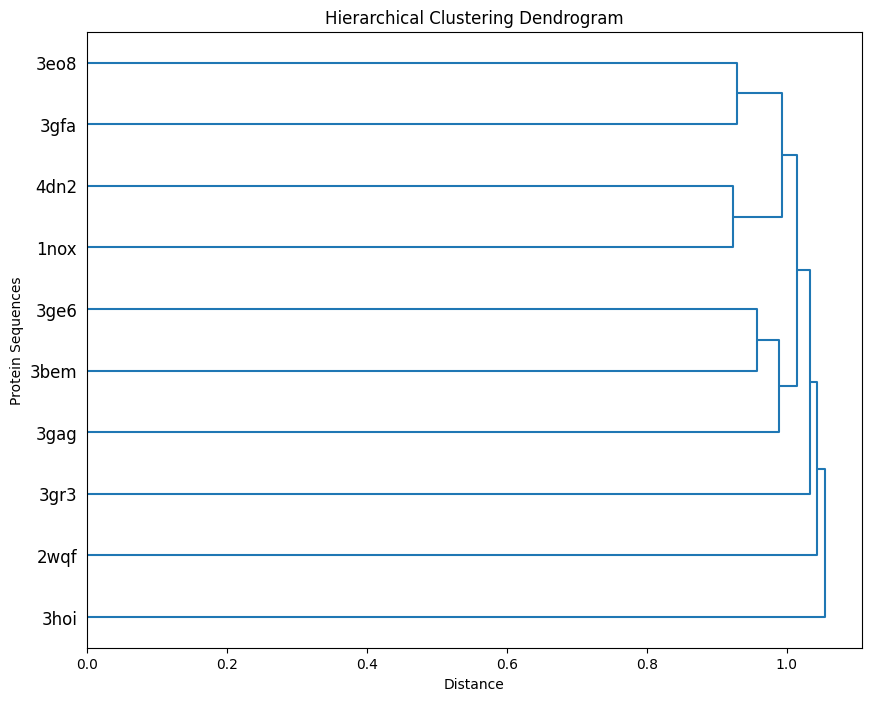

In [33]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assuming 'identity_matrix' is your pre-calculated identity matrix
linkage_matrix = linkage(identity_matrix, method='average')

# Set a larger figure size
fig = plt.figure(figsize=(10, 8))

# Plot the dendrogram
dendrogram(linkage_matrix, labels=[seq.id for seq in sequences], orientation='right')

# Adjust the plot
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Protein Sequences')
plt.show()


In [34]:
from Bio import SeqIO

# Specify the output FASTA file
output_file = "{}/output.fasta".format(data_dir)

# Write the sequences to the output file
SeqIO.write(sequences, output_file, "fasta")

print(f"Sequences saved to {output_file}")

Sequences saved to /content/drive/MyDrive/Colab Notebooks/output.fasta


#### MSA with Clustal Omega

1. Paste the un-aligned sequences in [Clustal Omega](https://www.ebi.ac.uk/Tools/msa/clustalo/) web service

  - "output.fasta"

2. Select format
```
OUTPUT FORMAT --> Pearson/FASTA
```

3. Save output
```
Right click "Download Alignment File" --> "clustalo-output.fasta"
```

4. Analyze ClustalO MSA in [JalView]()


In [35]:
from Bio import AlignIO

seqs = []  # [[...], ...]
with open("{}/clustalo-output.fasta".format(data_dir)) as f:
    for record in AlignIO.read(f, "fasta"):
        seqs.append(list(record.seq))  # store sequence as a list of characters
seqs = np.array(seqs, dtype="str")
seqs

array([['-', '-', '-', ..., 'A', 'K', '-'],
       ['-', 'G', 'A', ..., '-', '-', '-'],
       ['X', 'G', 'S', ..., '-', '-', '-'],
       ...,
       ['-', '-', '-', ..., 'Y', 'Q', 'A'],
       ['-', '-', '-', ..., '-', '-', '-'],
       ['-', '-', '-', ..., '-', '-', '-']], dtype='<U1')

In [36]:
import scipy.stats
from collections import Counter
import numpy as np
import pandas as pd

aa = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

# Print max possible entropy
print(scipy.stats.entropy([1/20 for i in range(20)], base=20))

data = []
for i, column in enumerate(seqs.T):

    # count AA in column
    count = Counter(column)
    if '-' in count:
      count.pop('-')
    count_sorted = sorted(count.items(), key=lambda x:x[1], reverse=True)

    # count non gap AA
    non_gap = np.count_nonzero(column != "-")

    occupancy = non_gap / column.size

    # AA probability in column (gap excluded)
    # probabilities = [count.get(k, 0.0) / column.size for k in aa]
    probabilities = [count.get(k, 0.0) / non_gap for k in aa]

    # Zero entropy = complete conservation
    entropy = scipy.stats.entropy(probabilities, base=20)

    data.append([i, occupancy, entropy, count_sorted])

df = pd.DataFrame(data, columns=['pos', 'occupancy', 'entropy', 'counts'])
df

0.9999999999999999


/usr/local/lib/python3.10/dist-packages/scipy/stats/_entropy.py:133: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


,pos,occupancy,entropy,counts
0,0,0.1,NaN,"[(X, 1)]"
1,1,0.2,0.000000,"[(G, 2)]"
2,2,0.2,0.231378,"[(A, 1), (S, 1)]"
3,3,0.2,0.231378,"[(E, 1), (D, 1)]"
4,4,0.2,0.231378,"[(R, 1), (K, 1)]"
...,...,...,...,...
283,283,0.9,0.404912,"[(I, 4), (R, 2), (X, 1), (K, 1), (G, 1)]"
284,284,0.5,0.317208,"[(K, 3), (V, 1), (E, 1)]"
285,285,0.3,0.366726,"[(A, 1), (S, 1), (Y, 1)]"
286,286,0.3,0.366726,"[(K, 1), (Y, 1), (Q, 1)]"


In [37]:
# Threshold for occupancy
occupancy_threshold = 0.5

# Threshold for a predominantly single amino acid column
single_aa_threshold = 0.8

# Filter columns based on occupancy and predominantly contain a single amino acid using count
predominantly_single_aa_columns_count = df[(df['occupancy'] > occupancy_threshold) & (df['counts'].apply(lambda x: x[0][1] / sum(d[1] for d in x) > single_aa_threshold))]

# Display the columns that meet the criteria
print("Columns with occupancy above", occupancy_threshold, "and predominantly containing a single amino acid (count-based):")
print(predominantly_single_aa_columns_count)


Columns with occupancy above 0.5 and predominantly containing a single amino acid (count-based):
     pos  occupancy   entropy            counts
26    26        1.0  0.000000         [(R, 10)]
28    28        1.0  0.108515  [(S, 9), (T, 1)]
63    63        1.0  0.108515  [(A, 9), (S, 1)]
64    64        1.0  0.000000         [(P, 10)]
65    65        1.0  0.108515  [(S, 9), (T, 1)]
68    68        1.0  0.000000         [(N, 10)]
70    70        1.0  0.000000         [(Q, 10)]
139  139        0.7  0.136900  [(D, 6), (K, 1)]
201  201        0.9  0.116443  [(G, 8), (S, 1)]
215  215        1.0  0.108515  [(G, 9), (R, 1)]
256  256        1.0  0.000000         [(G, 10)]


In [38]:
occupancy_threshold = 0.5

entropy_threshold = 0.15

conserved_entropy = df[(df['occupancy'] > occupancy_threshold) & (df['entropy'] < entropy_threshold)]
print("Columns with occupancy above", occupancy_threshold, "and entropy below", f"{entropy_threshold}:")
print(conserved_entropy)

Columns with occupancy above 0.5 and entropy below 0.15:
     pos  occupancy   entropy            counts
26    26        1.0  0.000000         [(R, 10)]
28    28        1.0  0.108515  [(S, 9), (T, 1)]
63    63        1.0  0.108515  [(A, 9), (S, 1)]
64    64        1.0  0.000000         [(P, 10)]
65    65        1.0  0.108515  [(S, 9), (T, 1)]
68    68        1.0  0.000000         [(N, 10)]
70    70        1.0  0.000000         [(Q, 10)]
139  139        0.7  0.136900  [(D, 6), (K, 1)]
201  201        0.9  0.116443  [(G, 8), (S, 1)]
215  215        1.0  0.108515  [(G, 9), (R, 1)]
256  256        1.0  0.000000         [(G, 10)]


## Building the Models

[PSI-BLAST](https://ftp.ncbi.nlm.nih.gov/blast/executables/blast+/LATEST/?fbclid=IwAR3ioaI-pNIh9NKNaWoCFczpgmxmrZLZONKmhwQ4AEzQq9kJnj_wbnQKbqA)
```
psiblast -subject "C:\Users\nikol\Desktop\output.fasta" -in_msa "C:\Users\nikol\Desktop\clustalo-output.fasta" -out_ascii_pssm "C:\Users\nikol\Desktop\clustalo-output.pssm_ascii" -out_pssm "C:\Users\nikol\Desktop\clustalo-output.pssm"
```

**PSSM** [NCBI BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastp)

```
"Enter Query Sequence" --> Upload the PSSM file
"Database" --> "UniProtKB/Swiss-Prot(swissprot)"
"Program Selection" --> "PSI-BLAST (Position-Specific Iterated BLAST)"
```

**HMM** [HMMSEARCH](https://www.ebi.ac.uk/Tools/hmmer/search/hmmsearch)

```
Provide your HMM
"Sequence Database" --> "SwissProt"
```